In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Make an array of the first 12 even numbers with shape (2, 6). Print the resulting array following each step below.

* Make every other value of the second row odd by subtracting 1 from it.
* Reverse the columns of the first row.
* Make the last value of the entire array the sum of all the other numbers beside the last value.
* Normalize each column of the array so that it sums to 1.

In [20]:
arr = np.arange(12.).reshape((2,6))

arr[1,::2] -= 1
print(arr)

arr[0,:] = arr[0,::-1]
print(arr)

arr[1,-1] = np.cumsum(arr)[-2]
print(arr)

arr[0] = arr[0] / np.sum(arr[0])
arr[1] = arr[1] / np.sum(arr[1])
print(arr)

[[ 0.  1.  2.  3.  4.  5.]
 [ 5.  7.  7.  9.  9. 11.]]
[[ 5.  4.  3.  2.  1.  0.]
 [ 5.  7.  7.  9.  9. 11.]]
[[ 5.  4.  3.  2.  1.  0.]
 [ 5.  7.  7.  9.  9. 52.]]
[[0.33333333 0.26666667 0.2        0.13333333 0.06666667 0.        ]
 [0.05617978 0.07865169 0.07865169 0.1011236  0.1011236  0.58426966]]


 ### 2) Create a two-dimensional array called *pts*, where the first columns contains 100 values of x linearly spaced from -5 to 5 and the second column contains the values for y = 0.5x - 1.
 
 * Print the shape of *pts* to ensure you have created the array correctly.
 * Introduce uniformly distribution noise from (-1, 3) into the y values of the *pts*.
 * Ensure that the noise you introduced was distributed as you intended by plotting a histogram of the values you used for the noise.
 * Create a scatter plot using the first and second columns of the *pts* array as x and y, respectively. Plot the line y = 0.5x - 1 on top of the scatter plot. Explain why the line does not appear to be the best fit to the points.

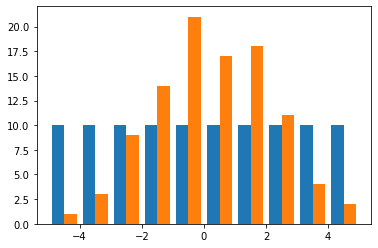

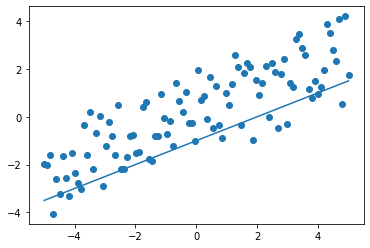

In [35]:
x = np.linspace(-5,5,100)
f = lambda x: 0.5*x -1
pts = [x,f(x)]

noise = np.random.uniform(-1,3,100) 
pts[1] = pts[1] + noise

plt.hist(pts)
plt.show()

plt.scatter(pts[0], pts[1])
plt.plot(x,f(x))
plt.show()
# the line is not the best fist as the added noise is not symmetric around 0

### 3) This will require a bit of googling around on your part. Make an array using linspace that goes from 0 to 360 in 180 steps. 
* Find all numbers in the array that are greater than 20
* Find all numbers in the array that less than 160 and greater than 45
* Find all numbers greater than 20 and less than 40 and assign to variable x. Then find all numbers that are greater than 60 and less than 81 and assign to variable y. 
    * Use an if...else statement and a boolean test to see if x and y are the same length. If they are, then multiply each element of x with the corresponding element in y. Do this first with a loop and then using the numpy equivalent. If x and y are not the same length then crop the longer of the two so that they are and then do the element by element multipication using a for loop and then using the numpy equivalent. A good implementation of this will handle all cases if you change the range of values assigned to x and y (i.e. it will handle when x is longer than y and when y is longer than x). 
* **Worth 5,000 bonus points**: which method, for loop vs numpy way, is faster? Google "cell magic timeit". Hint: when using the cell magic timeit, you'll need to do all variable assignments in the cell that you're timing (i.e. you'll need to assign x, y again in that cell)

In [41]:
arr = np.linspace(0,360,180)

num = arr[(arr<160)*(arr>45)]
print(num)


x = arr[(arr>20)*(arr<40)]
y = arr[(arr>60)*(arr<81)]
print(x)
print(y)

if len(x) == len(y):
#     arr1 = np.array([x[i]*y[i] for i in range(len(x))])
    arr2 = x * y
else:
    n = np.min((len(x),len(y)))
    x=x[:n]
    y=y[:n]
#     arr1 = np.array([x[i]*y[i] for i in range(len(x))])
    arr2 = x * y

[ 46.25698324  48.26815642  50.27932961  52.29050279  54.30167598
  56.31284916  58.32402235  60.33519553  62.34636872  64.3575419
  66.36871508  68.37988827  70.39106145  72.40223464  74.41340782
  76.42458101  78.43575419  80.44692737  82.45810056  84.46927374
  86.48044693  88.49162011  90.5027933   92.51396648  94.52513966
  96.53631285  98.54748603 100.55865922 102.5698324  104.58100559
 106.59217877 108.60335196 110.61452514 112.62569832 114.63687151
 116.64804469 118.65921788 120.67039106 122.68156425 124.69273743
 126.70391061 128.7150838  130.72625698 132.73743017 134.74860335
 136.75977654 138.77094972 140.78212291 142.79329609 144.80446927
 146.81564246 148.82681564 150.83798883 152.84916201 154.8603352
 156.87150838 158.88268156]
[20.11173184 22.12290503 24.13407821 26.1452514  28.15642458 30.16759777
 32.17877095 34.18994413 36.20111732 38.2122905 ]
[60.33519553 62.34636872 64.3575419  66.36871508 68.37988827 70.39106145
 72.40223464 74.41340782 76.42458101 78.43575419 80.

In [39]:
# using a jupyter extension:
# for loop in 42ms
# np in 8ms

array([20.11173184, 22.12290503, 24.13407821, 26.1452514 , 28.15642458,
       30.16759777, 32.17877095, 34.18994413, 36.20111732, 38.2122905 ])

### 4) Bonus: You are an administrative assistant for a small company. As part of your job as an administrative assistant, you are in charge of payroll for the company's five employees. Each of the employees receives a 3% raise each year. Every five years that an employee is a part of the company, they receive a 5,000 USD increase to their salary on top of the 3% raise (the 3% is applied before the 5,000 USD bonus). 

The five employees are:
* Petunia has been at the company 3 years and her salary is 55,000 USD
* Severus has been at the company 16 years and his salary is 85,000 USD
* Albus has been at the company 30 years and his salary is 115,000 USD
* Ginny has been at the company 8 years and her salary is 75,000 USD
* Harry just started at the company and his salary is 50,000 USD

**Note**: We asked you to solve this problem using lists last week. See if you can solve this problem more quickly using NumPy.

Here are your tasks:
* a) Calculate and print the salary of each employee 5 years from now.
* b) Determine and  print what the total payroll will be in 20 years, assuming nobody new starts and nobody leaves the company.
* c) **Challenge Problem**: Calculate and print the starting salary of each employee, assuming the same protocol for raises had been in place all along.

In [157]:
arr = np.array([[3.0, 55.0],[16, 85.0],[30, 115.0],[8, 75.0], [0, 50.0]])
names = ['Petunia', 'Severus', 'Albus', 'Ginny', 'Harry']

five_yrs = arr.copy()
for _ in range(5):
    five_yrs[:, 1] *= 1.03
    five_yrs[(five_yrs[:, 0] % 5 == 0)*(five_yrs[:, 0]!= 0), 1] += 5
for employee, (_, salary) in zip(names, five_yrs):
    print("{}'s salary will be {:.2f} USD 5 years from now.".format(employee, salary*1000))
    
twenty_yrs = arr.copy()
for _ in range(20):
    twenty_yrs[:, 1] *= 1.03
    twenty_yrs[(twenty_yrs[:, 0] % 5 == 0)*(twenty_yrs[:, 0]!= 0), 1] += 5
print('\nThe total payroll in 20 years will be {:.2f} USD.\n'.format(np.sum(twenty_yrs[:,1])*1000))

starting = arr.copy()
while sum(starting[:, 0]) > 0:
    starting[np.logical_and(starting[:, 0] % 5 == 0, starting[:, 0] != 0), 1] -= 5
    starting[starting[:, 0] != 0, 1] *= 0.97
    starting[starting[:, 0] != 0, 0] -= 1
for employee, (_, salary) in zip(names, starting):
    print("{}'s starting salary was {:.2f} USD.".format(employee, salary*1000))

Petunia's salary will be 63760.07 USD 5 years from now.
Severus's salary will be 98538.30 USD 5 years from now.
Albus's salary will be 159862.20 USD 5 years from now.
Ginny's salary will be 86945.56 USD 5 years from now.
Harry's salary will be 57963.70 USD 5 years from now.

The total payroll in 20 years will be 820674.14 USD.

Petunia's starting salary was 50197.01 USD.
Severus's starting salary was 41064.51 USD.
Albus's starting salary was 27909.89 USD.
Ginny's starting salary was 54487.08 USD.
Harry's starting salary was 50000.00 USD.


In [133]:
arr = np.array([[3.0, 55.0],[16, 85.0],[30, 115.0],[8, 75.0], [0, 50.0]])
names = ['Petunia', 'Severus', 'Albus', 'Ginny', 'Harry']

# five_yrs = arr.copy()

# for _ in range(5):
#     five_yrs[:, 1] *= 1.03
#     five_yrs[five_yrs[:, 0] % 5 == 0, 1] += 5
# for employee, (_, salary) in zip(names, five_yrs):
#     print("{}'s salary will be {:.2f} USD 5 years from now.".format(employee, salary*1000))
    
# twenty_yrs = arr.copy()
# for _ in range(20):
#     twenty_yrs[:, 1] *= 1.03
#     twenty_yrs"[twenty_yrs[:, 0] % 5 == 0, 1] += 5
# print('\nThe total payroll in 20 years will be {:.2f} USD.\n'.format(np.sum(twenty_yrs[:,1])*1000))

# starting = arr.copy()
# while sum(starting[:, 0]) > 0:
#     starting[np.logical_and(starting[:, 0] % 5 == 0, starting[:, 0] != 0), 1] -= 5
#     starting[starting[:, 0] != 0, 1] *= 0.97
#     starting[starting[:, 0] != 0, 0] -= 1
# for employee, (_, salary) in zip(names, starting):
#     print("{}'s starting salary was {:.2f} USD.".format(employee, salary*1000))


a = np.tile(arr,(5,1,1))
b = np.arange(5).repeat(5).reshape((5,5))
a[:,:,0] +=b
a[:,:,1] = a[:,:,1] * (1.03**b)

c = a[:,:,0] % 5 == 0
print(c)
# print(a)
a[:,:,1][c] += 5
# print(a)
d = np.argwhere(a[:,:,0] % 5 == 0)
d[:,0] -=1
d[d==-1] =0
print(a)


[[False False  True False  True]
 [False False False False False]
 [ True False False  True False]
 [False False False False False]
 [False  True False False False]]
[[[  3.          55.        ]
  [ 16.          85.        ]
  [ 30.         120.        ]
  [  8.          75.        ]
  [  0.          55.        ]]

 [[  4.          56.65      ]
  [ 17.          87.55      ]
  [ 31.         118.45      ]
  [  9.          77.25      ]
  [  1.          51.5       ]]

 [[  5.          63.3495    ]
  [ 18.          90.1765    ]
  [ 32.         122.0035    ]
  [ 10.          84.5675    ]
  [  2.          53.045     ]]

 [[  6.          60.099985  ]
  [ 19.          92.881795  ]
  [ 33.         125.663605  ]
  [ 11.          81.954525  ]
  [  3.          54.63635   ]]

 [[  7.          61.90298455]
  [ 20.         100.66824885]
  [ 34.         129.43351315]
  [ 12.          84.41316075]
  [  4.          56.2754405 ]]]


In [132]:
a[:,:,1][d[d[:,0]>0]] *= 1.03
after = a[1,:,:]

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 3 dimensions

In [143]:
a = np.tile(arr,(5,1,1))
b = np.arange(5).repeat(5).reshape((5,5))
a[:,:,0] +=b
d = np.argwhere(a[:,:,0] % 5 == 0)

# a[:,:,1] = a[:,:,1] * (1.03**b)

# c = a[:,:,0] % 5 == 0
# print(c)
# # print(a)
# a[:,:,1][c] += 5
# # print(a)
# d[:,0] -=1
# d[d==-1] =0
# print(a)

[[0 2]
 [0 4]
 [2 0]
 [2 3]
 [4 1]]


In [187]:
arr = np.array([[3.0, 55.0],[16, 85.0],[30, 115.0],[8, 75.0], [0, 50.0]])
names = ['Petunia', 'Severus', 'Albus', 'Ginny', 'Harry']
def challenge(arr, years=5):
    _ = (arr[:,0] -5)%5
    _[arr[:,0]==0] = 5
    arr[:,1] = np.multiply(arr[:,1], (1.03**_))
    arr[:,1] += 5
    arr[:,1] = np.multiply(arr[:,1], (1.03**np.abs(_-5)))
    print(arr)
    
challenge(arr)

[[  3.          69.06457409]
 [ 16.         104.16584037]
 [ 30.         139.11288892]
 [  8.          92.25005557]
 [  0.          62.96370372]]
